#### Strategy Creation
---

Universe is 505 single S&P 500 stocks

1. Stock Price > 200 Day MA
1. If 10-period RSI of stock < 30, buy next day's open
1. If 10-period RSI of stock > 40 OR after 10 trading days, sell next day's open

#### RSI Calculation
---

1. UpMove: Take daily return if return is positive else 0 if daily return is negative or zero
2. DownMove: abs(daily return) if return is negative else take zero if return is positive or zero
3. Average Up and Downmoves - Wilder's smoothing method (WSM) == Exponential Moving Avg with a different smoothing factor
4. Smoothing factor in EMA: alpha = 2/(N+1) and smoothing factor in WSM: alpha = N/10
    * If alpha = 0.1 then N/10 = 2/(N+1), hence N = 19 in WSM formula
5. Relative Strength (RS) = Average UpMove / Average DownMove
6. Relative Strength Index (RSI) = 100 - 100/(1+RS)


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers)

    Symbol       Security SEC filings             GICS Sector  \
0      MMM             3M     reports             Industrials   
1      AOS    A. O. Smith     reports             Industrials   
2      ABT         Abbott     reports             Health Care   
3     ABBV         AbbVie     reports             Health Care   
4     ABMD        Abiomed     reports             Health Care   
..     ...            ...         ...                     ...   
499    YUM    Yum! Brands     reports  Consumer Discretionary   
500   ZBRA          Zebra     reports  Information Technology   
501    ZBH  Zimmer Biomet     reports             Health Care   
502   ZION  Zions Bancorp     reports              Financials   
503    ZTS         Zoetis     reports             Health Care   

                      GICS Sub-Industry    Headquarters Location  \
0              Industrial Conglomerates    Saint Paul, Minnesota   
1                     Building Products     Milwaukee, Wisconsin   
2              

In [3]:
tickers = tickers.Symbol.to_list()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL

In [4]:
# Tickers with '.' need to be replaced by '-' in yf to extract data
tickers = [i.replace('.','-') for i in tickers]
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'AIG',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ANET',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL

In [5]:
# Remove VNT and WRK if they are present as they cause issues
try:
    tickers.index('VNT')
    tickers.remove('VNT')
except:
    pass

In [6]:
# Remove VNT and WRK if they are present as they cause issues
try:
    tickers.index('WRK')
    tickers.remove('WRK')
except:
    pass

In [7]:
def RSICalc(asset):
    df = yf.download(asset, start='2011-01-01')
    # 200 day MA
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    # Daily return
    df['PriceChange'] = df['Adj Close'].pct_change()
    # Up Move
    df['UpMove'] = df['PriceChange'].apply(lambda x: x if x > 0 else 0)
    # Down Move
    df['DownMove'] = df['PriceChange'].apply(lambda x: abs(x) if x < 0 else 0)
    # Avg Up Moves and Down Moves
    df['AvgUp'] = df['UpMove'].ewm(span=19).mean()
    df['AvgDown'] = df['DownMove'].ewm(span=19).mean()
    # Drop NA
    df = df.dropna()
    # Calculate RS and RSI
    df['RS'] = df['AvgUp']/df['AvgDown']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    # Set Buy decision rules
    df.loc[(df['Adj Close'] > df['MA200'])&(df['RSI'] < 30), 'Buy'] = 'Yes'
    df.loc[(df['Adj Close'] < df['MA200'])|(df['RSI'] > 30), 'Buy'] = 'No'
    return df

In [8]:
RSICalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA200,PriceChange,UpMove,DownMove,AvgUp,AvgDown,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-14,78.940002,79.230003,78.120003,78.889999,58.898838,2840800,65.425072,0.014010,0.014010,0.000000,0.011144,0.006978,1.596940,61.493149,No
2011-10-17,78.629997,79.050003,75.660004,75.879997,56.651577,4359500,65.392108,-0.038155,0.000000,0.038155,0.010029,0.010096,0.993421,49.834971,No
2011-10-18,76.180000,79.150002,75.709999,78.360001,58.503136,4167200,65.366608,0.032683,0.032683,0.000000,0.012295,0.009086,1.353119,57.503219,No
2011-10-19,78.260002,78.860001,77.269997,77.699997,58.010403,3865000,65.339083,-0.008422,0.000000,0.008422,0.011065,0.009020,1.226772,55.091939,No
2011-10-20,77.769997,79.059998,77.110001,78.680000,58.742069,4087300,65.315216,0.012613,0.012613,0.000000,0.011220,0.008118,1.382140,58.020946,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-03,146.210007,148.850006,145.919998,148.080002,148.080002,2508700,170.555677,0.014872,0.014872,0.000000,0.006252,0.005803,1.077381,51.862460,No
2022-05-04,149.000000,154.660004,147.880005,154.229996,154.229996,3694200,170.347842,0.041532,0.041532,0.000000,0.009780,0.005223,1.872584,65.188134,No
2022-05-05,153.169998,153.649994,148.229996,149.460007,149.460007,3315900,170.116400,-0.030928,0.000000,0.030928,0.008802,0.007793,1.129444,53.039386,No


In [19]:
def getSignals(df):
    BuyingDates = []
    SellingDates = []

    for i in range(len(df)-11):
        if "Yes" in df['Buy'].iloc[i]:
            # Buy on the next day
            BuyingDates.append(df.iloc[i+1].name)
            # Check selling rules - if RSI > 40 on any of the next 10 days after buying
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 40:
                    # name contains timestamp of date
                    SellingDates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    SellingDates.append(df.iloc[i+j+1].name)
    
    return BuyingDates, SellingDates

In [20]:
frame = RSICalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


In [21]:
# Buy signals
buy

[Timestamp('2012-03-07 00:00:00'),
 Timestamp('2012-04-11 00:00:00'),
 Timestamp('2012-05-15 00:00:00'),
 Timestamp('2012-05-16 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-05-21 00:00:00'),
 Timestamp('2012-06-05 00:00:00'),
 Timestamp('2012-06-06 00:00:00'),
 Timestamp('2012-10-24 00:00:00'),
 Timestamp('2012-10-25 00:00:00'),
 Timestamp('2013-08-22 00:00:00'),
 Timestamp('2014-01-27 00:00:00'),
 Timestamp('2014-01-28 00:00:00'),
 Timestamp('2014-01-29 00:00:00'),
 Timestamp('2014-01-31 00:00:00'),
 Timestamp('2014-02-03 00:00:00'),
 Timestamp('2014-02-04 00:00:00'),
 Timestamp('2014-08-01 00:00:00'),
 Timestamp('2014-08-04 00:00:00'),
 Timestamp('2014-08-06 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2014-08-08 00:00:00'),
 Timestamp('2014-10-02 00:00:00'),
 Timestamp('2014-10-03 00:00:00'),
 Timestamp('2015-04-30 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2016-10-12 00:00:00'),
 Timestamp('2016-10-13 00:00:00'),
 Timestamp('2016-10-

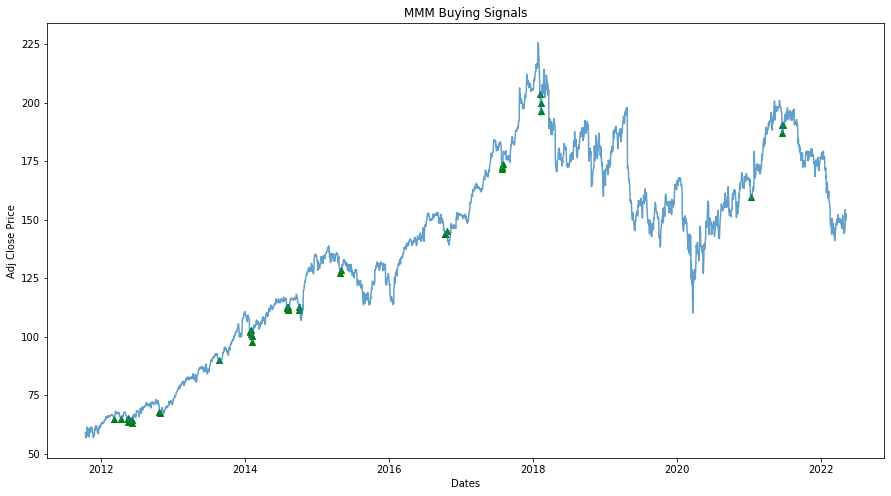

In [22]:
plt.figure(figsize=(15,8))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker='^', c='g')
plt.plot(frame['Adj Close'], alpha=0.7)
plt.title('MMM Buying Signals')
plt.xlabel("Dates")
plt.ylabel('Adj Close Price')
plt.show()

In [23]:
# Time to calculate PnL
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
Profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925])

In [24]:
# Winning Rate
wins = [i for i in Profits if i > 0]
wins

[0.018418579706364967,
 0.013238018338075487,
 0.0021231458807208312,
 0.012875558731741366,
 0.03632401178135978,
 0.028478671982978803,
 0.010333574992244634,
 0.015580865509459993,
 0.010122361761294841,
 0.0010817790030185125,
 0.023459785828550146,
 0.010528826163336873,
 0.027599421741614928,
 0.005565457104999853,
 0.005565457104999853,
 0.012864692352916469,
 0.006283395964641448,
 0.011701289219769826,
 0.018618650760615963,
 0.013062456337555556,
 0.013008501408338877,
 0.013202419879189003,
 0.003553065203201138,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 0.014090350783795424,
 0.011209247430109006]

In [25]:
len(wins)/len(Profits)

0.825

In [26]:
len(wins)

33

In [27]:
len(Profits)

40

Debug problematic tickers

In [35]:
# Few tickers causing problems
# Remove CEG and WRK if they are present as they cause issues
try:
    tickers.index('CEG')
    tickers.remove('CEG')
except:
    pass


Only make 40 trades in 10 years

In [37]:
MatrixSignals = []
MatrixProfits = []

# Uncomment for 500+ stocks
# for i in range(len(tickers)):
for i in range(50): # Only takes 50 stocks from S&P 500 universe
    print(i)
    frame = RSICalc(tickers[i])
    buy, sell = getSignals(frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    MatrixSignals.append(buy)
    MatrixProfits.append(Profits)

print('Finished!')
    

0
[*********************100%***********************]  1 of 1 completed
1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
9
[*********************100%***********************]  1 of 1 completed
10
[*********************100%***********************]  1 of 1 completed
11
[*********************100%***********************]  1 of 1 completed
12
[*********************100%***********************]  1 of 1 completed
13
[*********************100%***********************]  1 of 1 completed
14

In [38]:
len(MatrixProfits)

50

In [39]:
AllProfits = []

for i in MatrixProfits:
    for e in i:
        AllProfits.append(e)

In [40]:
AllProfits

[0.018418579706364967,
 0.013238018338075487,
 -0.011518300161961533,
 -0.011058136854156816,
 0.0021231458807208312,
 0.012875558731741366,
 0.03632401178135978,
 0.028478671982978803,
 0.010333574992244634,
 0.015580865509459993,
 0.010122361761294841,
 -0.0034609824138999794,
 0.0010817790030185125,
 -0.004073779818850855,
 0.023459785828550146,
 0.010528826163336873,
 0.027599421741614928,
 0.005565457104999853,
 0.005565457104999853,
 0.012864692352916469,
 0.006283395964641448,
 0.011701289219769826,
 0.018618650760615963,
 0.013062456337555556,
 0.013008501408338877,
 0.013202419879189003,
 -0.0007665381965443523,
 0.003553065203201138,
 -0.018418724518970305,
 0.013669271812818008,
 0.020337466426487982,
 0.011952832489283168,
 0.01595001220703125,
 0.008527108646859727,
 0.02154844541533546,
 0.00861572556046653,
 0.01892706151398465,
 -0.005284596182899224,
 0.014090350783795424,
 0.011209247430109006,
 0.011390001361125114,
 0.026858548374935554,
 0.030807678266960632,
 0.03

In [41]:
wins = [i for i in AllProfits if i > 0]

In [42]:
len(wins)/len(AllProfits)

0.68554476806904

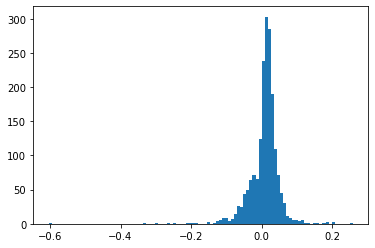

In [43]:
plt.hist(AllProfits, bins=100)
plt.show()

In [44]:
# 2021 Signals
for i in MatrixSignals:
    for e in i:
        if e.year == 2021:
            print(e)

2021-01-12 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-09-15 00:00:00
2021-09-16 00:00:00
2021-09-17 00:00:00
2021-09-20 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-09-03 00:00:00
2021-09-07 00:00:00
2021-09-08 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-05-05 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-06-22 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-06-28 00:00:00
2021-06-29 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00
2021-07-02 00:00:00
2021-07-06 00:00:00
2021-07-07 00:00:00
2021-07-08 00:00:00
2021-07-09 00:00:00
2021-07-15 00:00:00
2021-07-19 00:00:00
2021-07-20 00:00:00
2021-07-23 00:00:00
2021-09-28 00:00:00
2021-09-29 00:00:00
2021-09-30 00:00:00
2021-10-01 00:00:00
2021-10-04 00:00:00
2021-10-05 00:00:00
2021-10-06 00:00:00
2021-10-07 00:00:00
2021-01-15 00:00:00
